# 일정시간 (ex. 앞 0.5초 ref 뒤 0.5 after 이런식으로 데이터 표시하기.)

In [61]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/session_2_clean.xlsx') # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0
1,2,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
2,3,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
3,4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
4,5,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
...,...,...,...,...,...,...,...,...
66955,66990,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66956,66991,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66957,66992,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66958,66993,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0


In [62]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0
1,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
2,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
3,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0


In [63]:
# 자극 시점 index 저장 (맨앞, 맨뒤 인덱스 포함)
point = []
point.append(0)
for i in range(len(data)) :
    if data['stimulus'][i] == 1:
        point.append(i)
point.append(len(data))
point

[0,
 7752,
 10572,
 13380,
 16212,
 19020,
 29520,
 32340,
 35149,
 37968,
 40776,
 51276,
 54084,
 56916,
 59724,
 62544,
 66960]

In [64]:
# 시간 간격 정해서 체크해주는거
data['temp'] = 0
start_idx = 0
end_idx = 0
# time_s = datetime.timedelta(days=14)
time_s = datetime.strptime('0:00:02.100000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.600000', "%H:%M:%S.%f")  #2초 #1.5
time_e = datetime.strptime('0:00:01.000000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.500000', "%H:%M:%S.%f")  #1초 #0.5
# time_delta로 맞춰줘야해서 
print(time_s, time_e)

# time_s = datetime.strptime('0:00:01.000000', "%H:%M:%S.%f") # 200ms 만들기
# time_e = datetime.strptime('0:00:00.500000', "%H:%M:%S.%f") # 200ms 만들기


for j in range(0, len(point)-1) :
    globals()['temp_idx_ref{}'.format(j)] = []
    globals()['temp_idx_after{}'.format(j)] = []
    for i in range(point[j-1], point[j]) : # stimulus time부터 앞으로 1.0~0.5s에 1 표시한거 즉, 자극 이전 레퍼런스 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = time_stimulus - time_data
        if time_interval > time_e and time_interval < time_s :
            data['temp'][i] = str(j) + 'ref'
            globals()['temp_idx_ref{}'.format(j)].append(i) # 각 인덱스 저장해주는 코드
        
    for i in range(point[j], point[j+1]) : # stimulus time부터 뒤로 0.5~1.0s에 2 표시한거 즉, 자극 이후 변화한 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = -(time_stimulus - time_data)
        if time_interval > time_e and time_interval < time_s :
            data['temp'][i] = str(j) + 'after'
            print(i)
            globals()['temp_idx_after{}'.format(j)].append(i)
        
## 여기까지하면 1Sec after 마다 시작점, 끝나는 점 기록한 temp_idx_ref1~15,  temp_idx_after1~15가 생김.

0:00:01.500000 0:00:00.500000
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
38

<ipython-input-64-e9fbde5f2843>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'][i] = str(j) + 'after'
<ipython-input-64-e9fbde5f2843>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'][i] = str(j) + 'ref'


7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072


32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32639
32640
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
32675
32676
32677
32678
32679
32680
32681
32682
32683
32684
32685
32686
32687
32688
32689
32690
32691
32692
32693
32694
32695
32696
32697
32698
32699
32700
32701
32702
32703
32704
32705
32706
32707
32708
32709
32710
32711
32712
32713
32714
32715
32716
32717
32718
32719
32720
32721
32722
32723
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
3533

57258
57259
57260
57261
57262
57263
57264
57265
57266
57267
57268
57269
57270
57271
57272
57273
57274
57275
57276
57277
57278
57279
57280
57281
57282
57283
57284
57285
57286
57287
57288
57289
57290
57291
57292
57293
57294
57295
57296
57297
57298
57299
59856
59857
59858
59859
59860
59861
59862
59863
59864
59865
59866
59867
59868
59869
59870
59871
59872
59873
59874
59875
59876
59877
59878
59879
59880
59881
59882
59883
59884
59885
59886
59887
59888
59889
59890
59891
59892
59893
59894
59895
59896
59897
59898
59899
59900
59901
59902
59903
59904
59905
59906
59907
59908
59909
59910
59911
59912
59913
59914
59915
59916
59917
59918
59919
59920
59921
59922
59923
59924
59925
59926
59927
59928
59929
59930
59931
59932
59933
59934
59935
59936
59937
59938
59939
59940
59941
59942
59943
59944
59945
59946
59947
59948
59949
59950
59951
59952
59953
59954
59955
59956
59957
59958
59959
59960
59961
59962
59963
59964
59965
59966
59967
59968
59969
59970
59971
59972
59973
59974
59975
59976
59977
59978
59979
5998

In [65]:
data

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus,temp
0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0,0
1,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
2,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
3,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
...,...,...,...,...,...,...,...,...
66955,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66956,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66957,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66958,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0


In [56]:
# 일정 시간 잘라서 ref와 after 표시한거 파일로 저장
data.to_excel("./clean_dataset/clean_stimulus/session_2_clean_stimulus_1sec_0.5-1.5.xlsx")

In [59]:
import pandas as pd
from datetime import datetime

data = pd.read_excel("./clean_dataset/clean_stimulus/session_2_clean_stimulus_1sec_0.5-1.5.xlsx") # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus,temp
0,0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0,0
1,1,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
2,2,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
3,3,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
4,4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
...,...,...,...,...,...,...,...,...,...
66955,66955,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66956,66956,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66957,66957,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66958,66958,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0


# 여기서부터 히트맵 

In [131]:
# bins는 각 trial 마다의 temp_idx_after1 이거 가져와서 10개씩 자른 index 저장한거.
bins = list(range(temp_idx_after15[0],temp_idx_after15[-1], 10))# 수정 2
bins

[62679,
 62689,
 62699,
 62709,
 62719,
 62729,
 62739,
 62749,
 62759,
 62769,
 62779,
 62789,
 62799,
 62809,
 62819,
 62829,
 62839,
 62849,
 62859,
 62869,
 62879,
 62889,
 62899,
 62909,
 62919,
 62929]

In [132]:
after15_mean_10_sec = pd.DataFrame(columns=['delta','theta','alpha','beta','gamma'])# 수정
for i in range(0,len(bins)-1):
    delta = data['Delta_AF8'][bins[i]:bins[i+1]].mean()
    theta = data['Theta_AF8'][bins[i]:bins[i+1]].mean()
    alpha = data['Alpha_AF8'][bins[i]:bins[i+1]].mean()
    beta = data['Beta_AF8'][bins[i]:bins[i+1]].mean()
    gamma = data['Gamma_AF8'][bins[i]:bins[i+1]].mean()
    
    after15_mean_10_sec.loc[i]=[delta,theta,alpha,beta,gamma]# 수정
after15_mean_10_sec# 수정

,delta,theta,alpha,beta,gamma
0,0.071128,-0.012678,0.300875,0.372232,0.156779
1,0.070662,-0.027055,0.271608,0.349807,0.156073
2,0.070662,-0.027055,0.271608,0.349807,0.156073
3,0.069846,-0.043204,0.266475,0.336652,0.155255
4,0.069303,-0.053971,0.263053,0.327882,0.154710
5,0.069303,-0.053971,0.263053,0.327882,0.154710
6,0.057794,-0.098140,0.261783,0.313474,0.150110
7,0.057794,-0.098140,0.261783,0.313474,0.150110
8,0.046517,-0.123061,0.260983,0.309080,0.147005
9,0.029601,-0.160443,0.259783,0.302489,0.142347


Text(0.5, 30.5, 'Time(sec)')

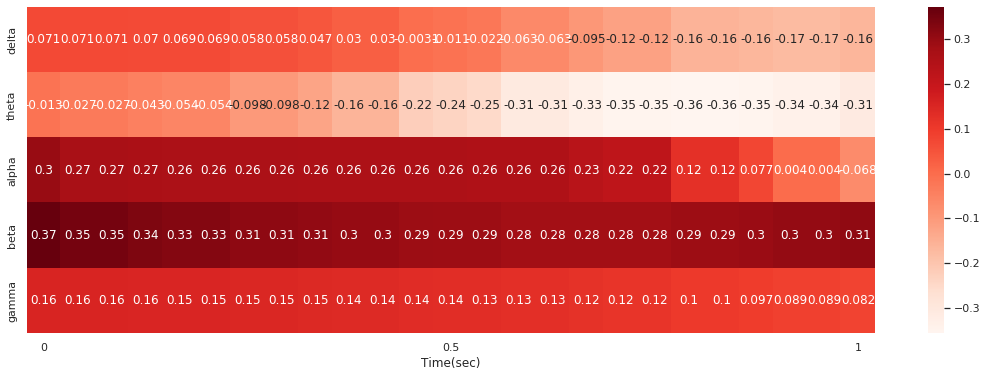

In [133]:
after15_mean_10_sec_T = after15_mean_10_sec.transpose()# 수정 2

from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(19,6)})
ax=sns.heatmap(after15_mean_10_sec_T, cmap='Reds', annot=True,xticklabels=xtime)# 수정
plt.xlabel("Time(sec)")


In [134]:
sfig = ax.get_figure()
sfig.savefig('./분석 시각화/session2_0.5-1.5/after15_mean_10_sec.png',  orientation="landscape") # 수정